In [21]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import openpyxl as xl

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

%matplotlib inline

from openpyxl import load_workbook


In [22]:

# Load in the workbook
# SB NOTES: I've updated the path - it's generally helpful to keep files in the same folder as your notebook so you don't need to reference the full path. also makes sharing easier.
path = "H Band v3 Measurements.xlsm"

wb_obj = xl.load_workbook(path)

# Get the Line Fitting Novas , put in DF1
ws1 = wb_obj['PythonGraph']
data = ws1.values
# Get the first line in file as a header line
columns = next(data)[0:]
# Create a DataFrame based on the second and subsequent lines of data
df1 = pd.DataFrame(data, columns=columns)


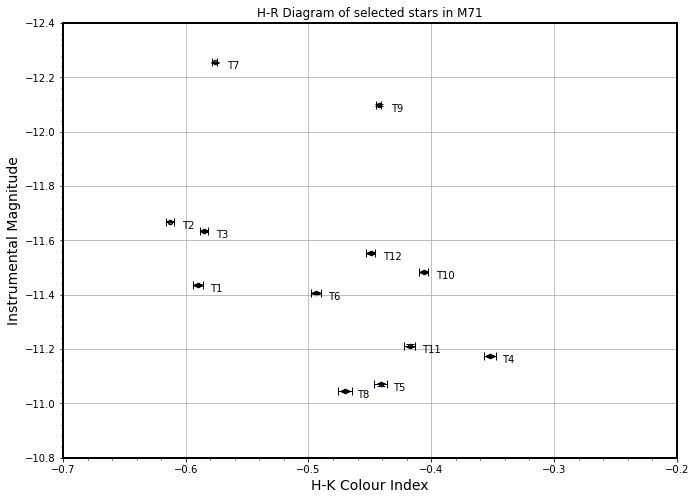

In [32]:
Star_Name=df1['Star_Name']
x1=df1['H-K']
y1=df1['Magnitude']
yerror=df1['Error Bars']
xerror= df1['Error Bars']

fig, ax = plt.subplots()
ax.scatter(x1, y1, marker='o', s=20.0,  edgecolors='k')

#annotation
annotationYAxisOffset = 0.025 #you could potentially do something smarter than this
annotationXAxisOffset = 0.01 #you could potentially do something smarter than this


for i, txt in enumerate(Star_Name):
    ax.annotate(txt, (x1[i] + annotationXAxisOffset, y1[i] + annotationYAxisOffset))

plt.grid(b=True, which='major', axis='both')

#add error bars
plt.errorbar(x1,y1,xerr=xerror,yerr=yerror,linestyle="None", elinewidth=1, capsize=4,color='k')

#now fix inverted scale on y axis
#   ax=scatter.axes
ax.set_ylim(-10.8,-12.4)
ax.set_xlim(-0.7,-0.2)

# fix small tick labels & graph size
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
fig = plt.gcf()
fig.set_size_inches(11,8)

ax.set_xlabel("H-K Colour Index",fontsize=14)
ax.set_ylabel("Instrumental Magnitude",fontsize=14)

plt.title('H-R Diagram of selected stars in M71')


ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

fig.savefig("UVOIR1.tiff");